Let's first setup our imports

In [1]:
import pandas as pd
import numpy as np
from sklearn import cluster
import sklearn.metrics as sm
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets

## Step 1: Import and format the data

Sklearn already has the Iris dataset built in, so all we have to do is import it!

In [2]:
df = pd.read_csv('../../DSI-CHI-1/lessons/week-07/1.3-tuning-clusters/assets/datasets/wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Define the "x" and "y" variables. *Remember*, y is our classifer, and x is our attributes.

In [4]:
X = df.drop('quality', axis=1)
y = df['quality']

## Step 2: Plot the data to estimate clusters

Plot the data using scatterplots - take a look at all the combinations of variables to get a feel for how the data is distributed. 

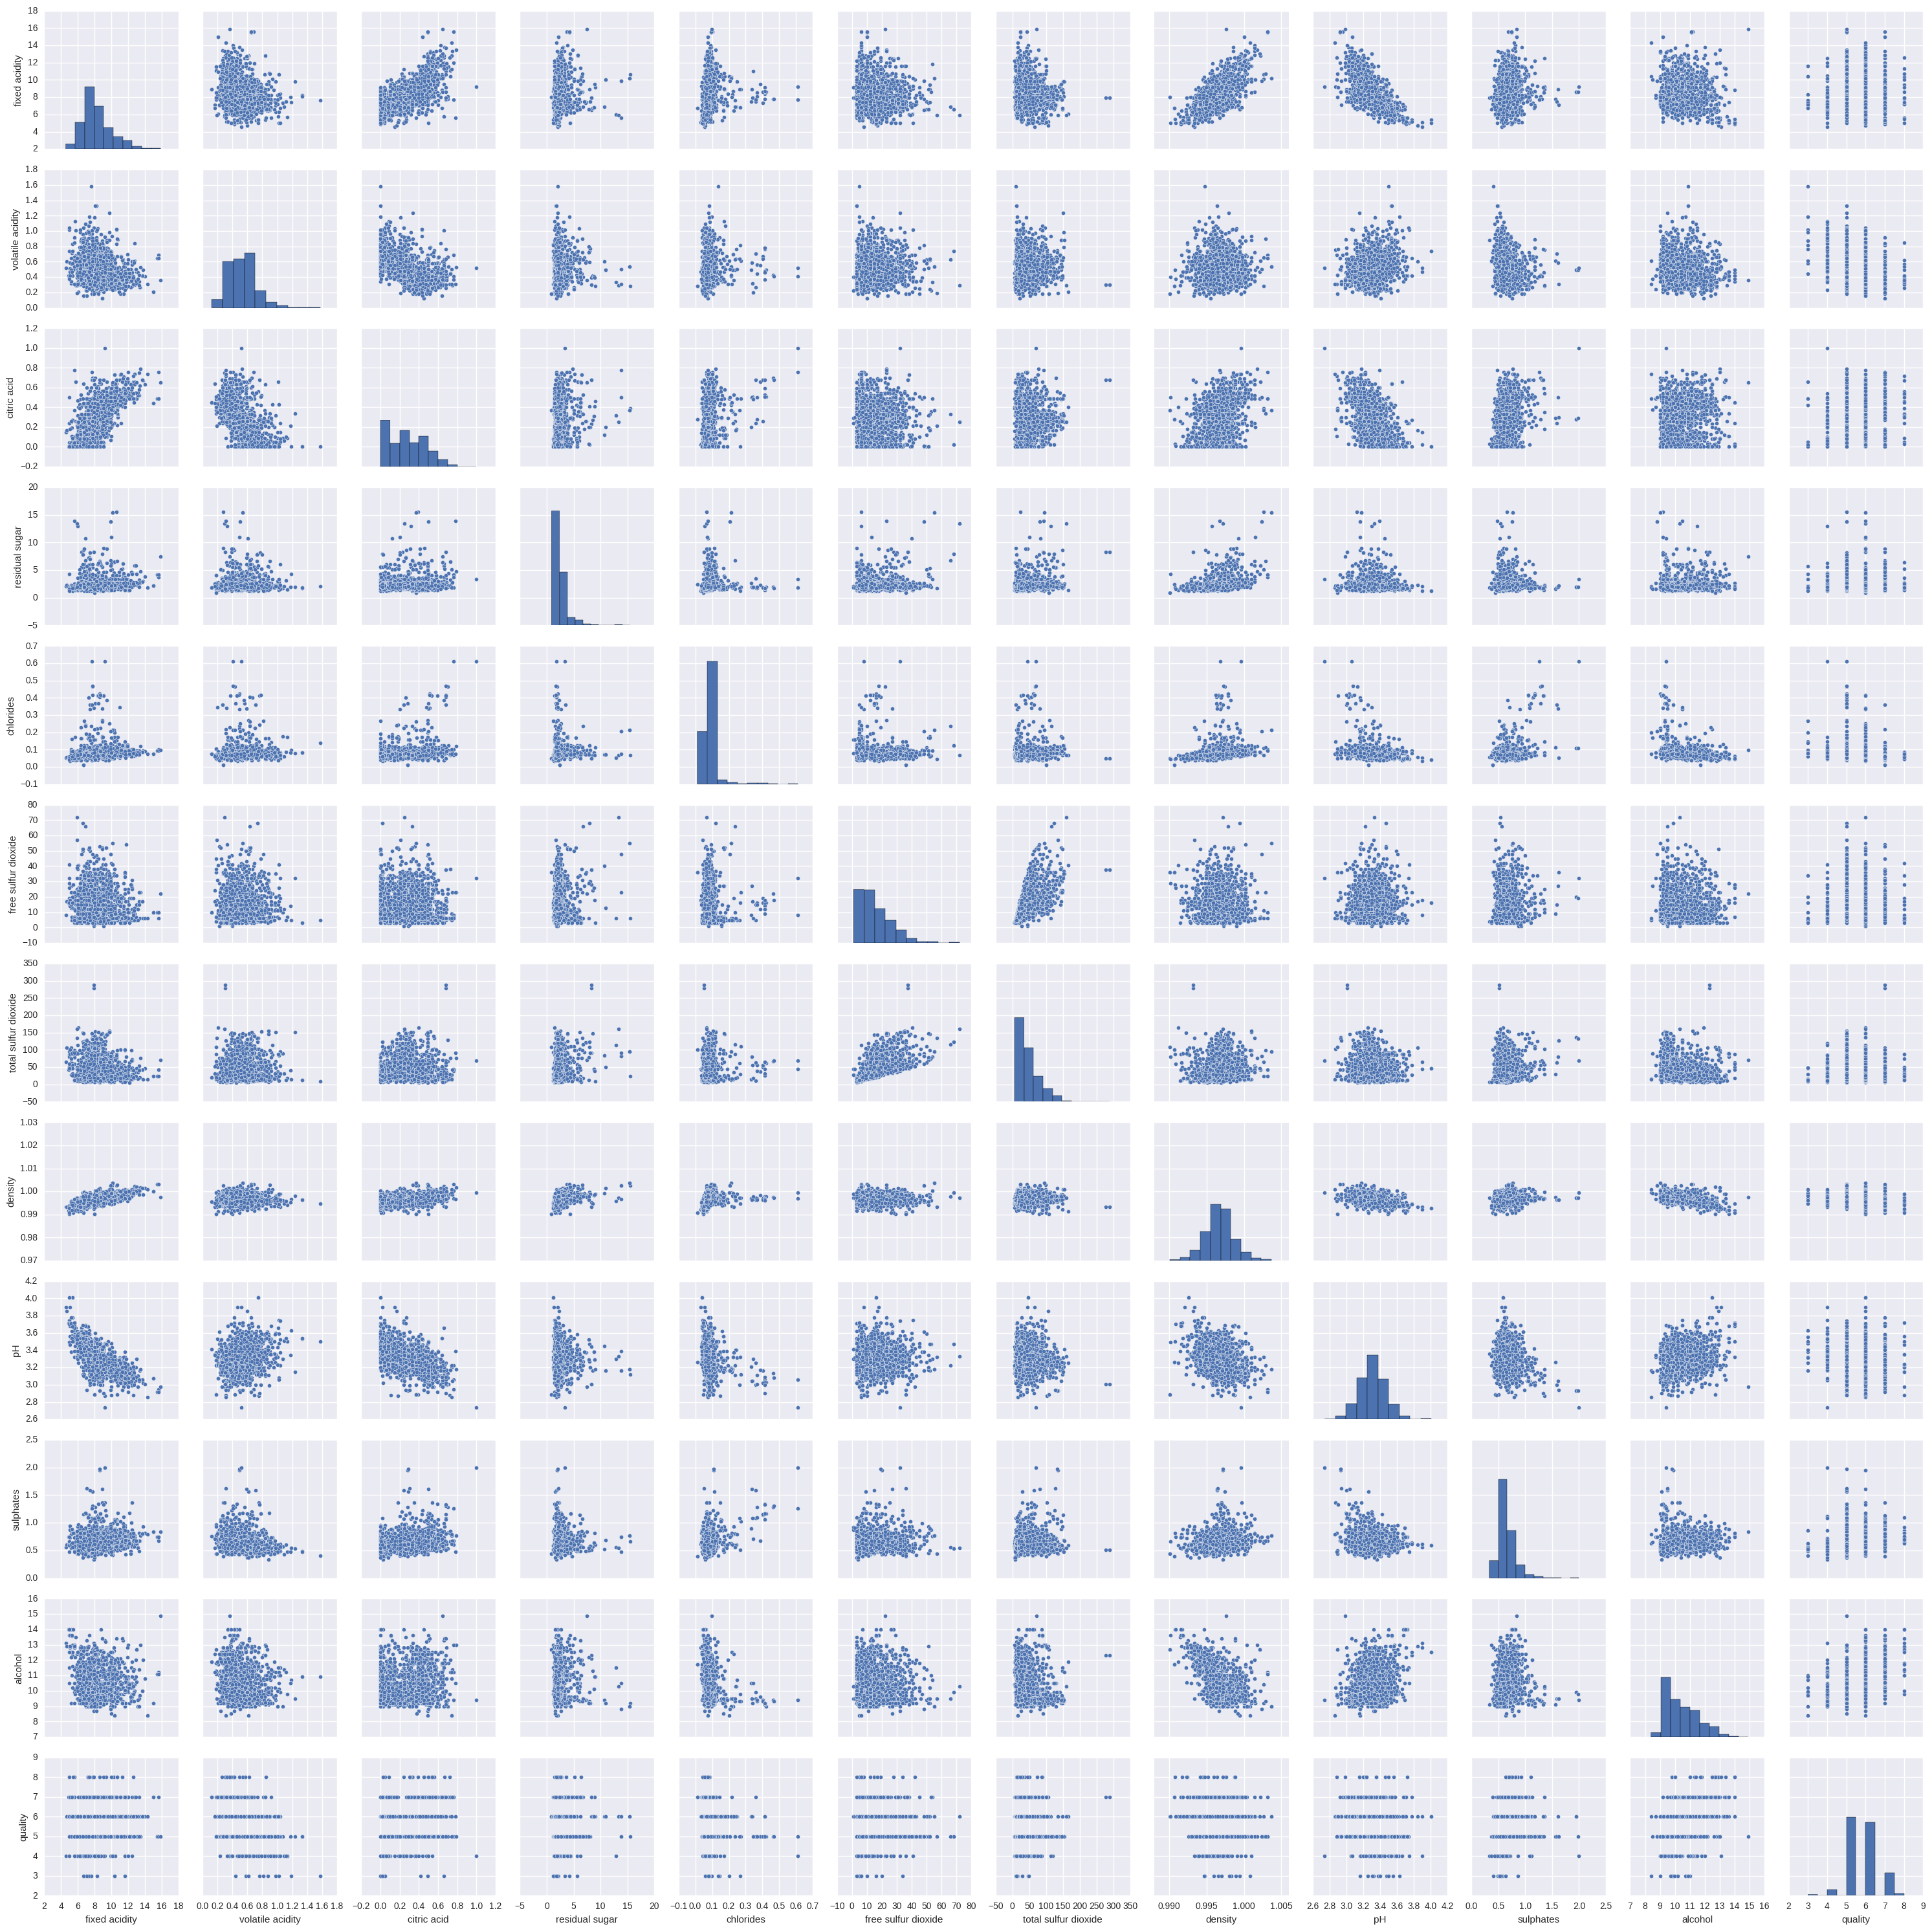

In [3]:
sns.pairplot(df)

## Step 3: Cluster the data

Run the clustering analysis using scikit-learn.

*Hint*: Estimate the number of clusters, k, based on your visual examination of the distributions.

In [5]:
from sklearn.preprocessing import StandardScaler

X_standard = StandardScaler().fit_transform(X)

In [6]:
k = 8
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_standard)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

Compute the labels and centroids

In [7]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print labels

[2 2 2 ..., 6 6 1]


In [11]:
predictions = kmeans.predict(X_standard)

In [12]:
predY = np.choose(labels, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).astype(np.int64)

In [13]:
sm.accuracy_score(y, predictions)

0.075672295184490312

In [14]:
pd.Series(predictions).value_counts()

2    328
3    301
0    283
4    236
1    233
6    156
7     34
5     28
dtype: int64

In [15]:
df = df.join(pd.DataFrame(predictions, columns=['clusters8']))
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clusters8
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,4
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [17]:
df.groupby('clusters8')['quality'].value_counts()

clusters8  quality
0          5          160
           6          107
           4            9
           7            7
1          6          114
           7           86
           5           22
           8            9
           4            2
2          5          166
           6          107
           4           30
           7           18
           3            7
3          5          203
           6           83
           7           10
           4            4
           3            1
4          6          111
           5           66
           7           49
           8            5
           4            3
           3            2
5          5           17
           6            9
           4            1
           7            1
6          6           95
           5           31
           7           23
           8            4
           4            3
7          5           16
           6           12
           7            5
           4       

In [22]:
df.groupby('clusters8')['alcohol'].mean()

clusters8
0     9.699117
1    11.596996
2    10.108943
3     9.857254
4    10.530791
5     9.496429
6    11.822222
7    10.035294
Name: alcohol, dtype: float64

In [23]:
df.groupby('clusters8')['pH'].mean()

clusters8
0    3.265972
1    3.292103
2    3.426616
3    3.298638
4    3.147585
5    3.043214
6    3.509038
7    3.260882
Name: pH, dtype: float64

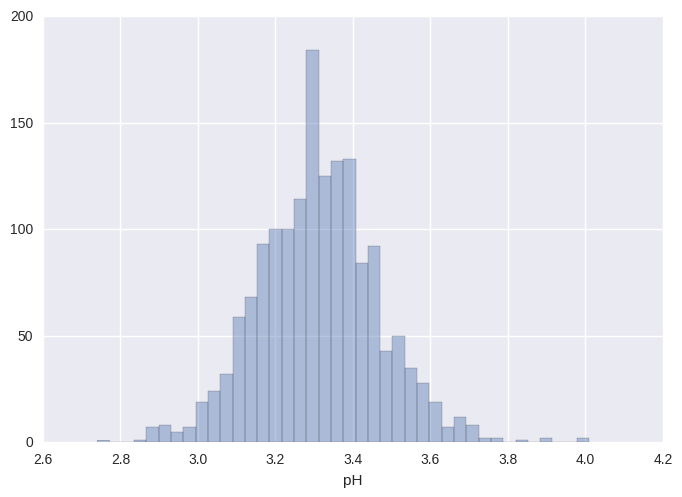

In [24]:
sns.distplot(df['pH'], kde=False)

In [25]:
df.groupby('clusters8')['residual sugar'].mean()

clusters8
0    2.112014
1    2.305794
2    2.388872
3    2.548671
4    2.812712
5    1.989286
6    2.117308
7    9.532353
Name: residual sugar, dtype: float64

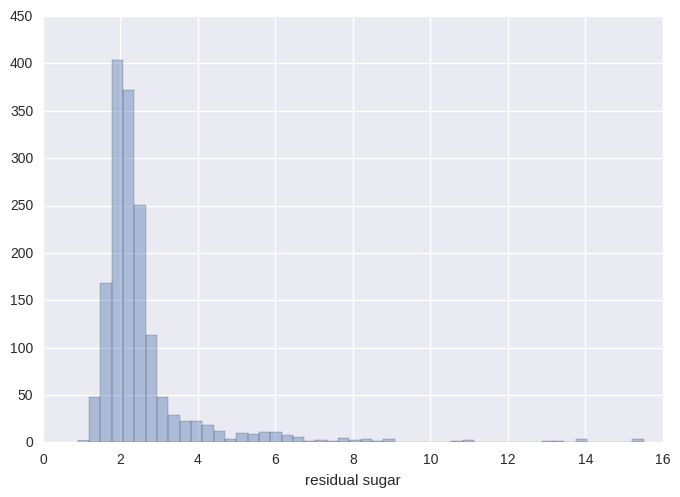

In [26]:
sns.distplot(df['residual sugar'], kde=False)

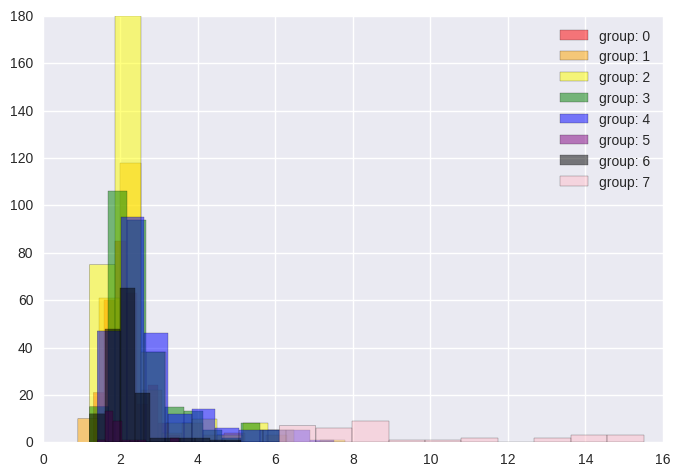

In [32]:
for x in zip(range(0, 8), ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'black', 'pink']):
    plt.hist(df.loc[(df['clusters8'] == x[0]), 'residual sugar'], color=x[1], alpha=0.5, 
            label='group: ' + str(x[0]))
plt.legend()

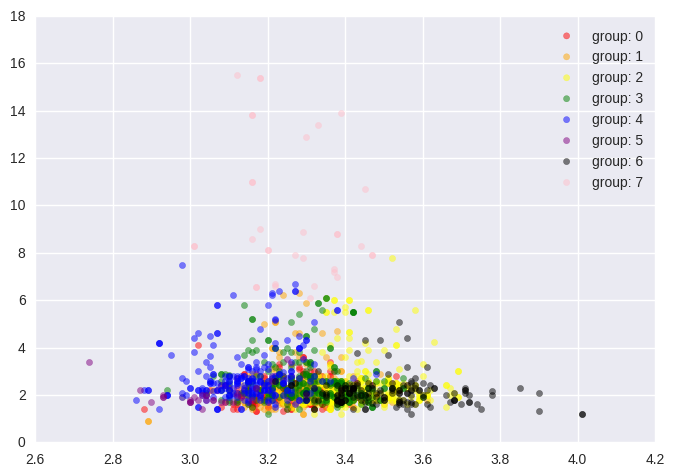

In [34]:
for x in zip(range(0, 8), ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'black', 'pink']):
    plt.scatter(df.loc[(df['clusters8'] == x[0]), 'pH'], df.loc[(df['clusters8'] == x[0]), 'residual sugar'],
                color=x[1], alpha=0.5, 
            label='group: ' + str(x[0]))
plt.legend()

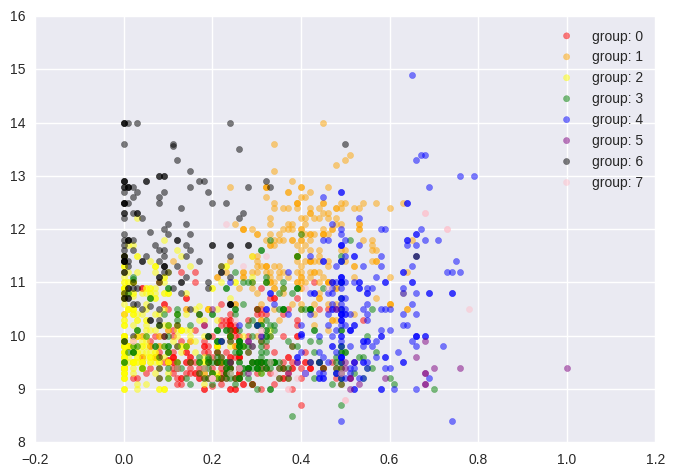

In [36]:
for x in zip(range(0, 8), ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'black', 'pink']):
    plt.scatter(df.loc[(df['clusters8'] == x[0]), 'citric acid'], df.loc[(df['clusters8'] == x[0]), 'alcohol'],
                color=x[1], alpha=0.5, 
            label='group: ' + str(x[0]))
plt.legend()

In [40]:
df.loc[(df['clusters8'] == 5)].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clusters8
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.0
mean,8.485714,0.528214,0.501071,1.989286,0.359643,15.357143,63.250000,0.997086,3.043214,1.278929,9.496429,5.357143,5.0
std,0.767736,0.151610,0.199895,0.470098,0.125557,6.436092,34.212435,0.000727,0.118417,0.352350,0.404129,0.621485,0.0
min,7.300000,0.200000,0.180000,1.400000,0.110000,5.000000,10.000000,0.996230,2.740000,0.670000,9.000000,4.000000,5.0
25%,7.800000,0.437500,0.287500,1.700000,0.335750,11.500000,43.250000,0.996550,3.000000,1.080000,9.200000,5.000000,5.0
50%,8.600000,0.490000,0.510000,1.850000,0.378000,16.000000,62.000000,0.996960,3.035000,1.170000,9.400000,5.000000,5.0
75%,8.900000,0.635000,0.680000,2.000000,0.415000,19.000000,69.000000,0.997225,3.112500,1.345000,9.650000,6.000000,5.0
max,11.000000,0.780000,1.000000,3.500000,0.611000,32.000000,136.000000,0.999600,3.300000,2.000000,10.500000,7.000000,5.0


In [41]:
from sklearn.metrics import silhouette_score

silhouette_score(X_standard, predictions)

0.14966987654349101

In [42]:
list_of_scores = []

for x in range(2, 25):
    kmeans = KMeans(n_clusters=x)
    kmeans.fit(X_standard)
    predictions = kmeans.predict(X_standard)
    sil = silhouette_score(X_standard, predictions)
    list_of_scores.append((x, sil))

In [43]:
list_of_scores

[(2, 0.21372996335474811),
 (3, 0.1892040681106866),
 (4, 0.17181920232235171),
 (5, 0.1902699335922754),
 (6, 0.19244552762535075),
 (7, 0.19053452062623827),
 (8, 0.14932946891547272),
 (9, 0.15299279091398452),
 (10, 0.15528183292535119),
 (11, 0.1502939830437017),
 (12, 0.14703874705258432),
 (13, 0.13155115912307885),
 (14, 0.14245879927011887),
 (15, 0.14439129840559783),
 (16, 0.14134417356398163),
 (17, 0.14302451161892779),
 (18, 0.14203240258312416),
 (19, 0.13724317173133277),
 (20, 0.14298527385273693),
 (21, 0.14324070950648413),
 (22, 0.14374329375218131),
 (23, 0.14427765037867246),
 (24, 0.14657104261412041)]

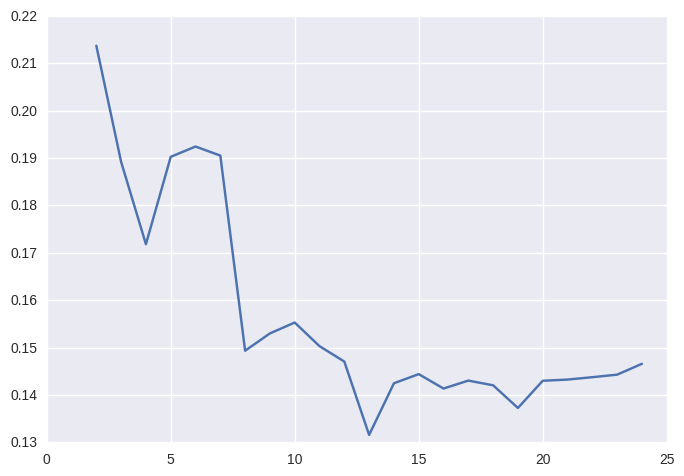

In [49]:
plt.plot([x[0] for x in list_of_scores], [x[1] for x in list_of_scores])

In [54]:
df.shape

(1599, 13)

Plot the predicted vs actual classifcations to see how our clustering analysis compares

Check the centroids to see where each cluster is lying 

Check the labels of the clusters

Compute the accuracy score using scikit to see how accurate our analysis is

Compute the silhoutte coefficient to see how consistent our data is within the clusters

Calculate the Precision, Recall, and F - Score to see the test's accuracy

Compute the Confusion Matrix to test the performance of the clustering analysis